<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/kursPawe%C5%82Krakowiak/ML-decision-trees-and-random-forests/decision_trees/classification/08_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

## Churn Problem

### Import bibliotek

churn jest wtedy gdy klient chce odejść z firmy (na przykład z telekomu). Wtedy można mu dać korzystniejszą ofertę i go zatrzymać w klienteli

In [ ]:
print("#############################################")
print("Etap7. Odcinek2: Model rezygnacji klientów - Churn Modelling cz. 1")

import pandas as pd
import numpy as np

#############################################
Etap7. Odcinek2: Model rezygnacji klientów - Churn Modelling cz. 1


### Pobranie danych

In [ ]:
# dane są w bucket s3 w chmurze Amazona
%%bash
wget -q https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/datasets/churn.csv

### Wczytanie danych

In [ ]:
df = pd.read_csv('churn.csv')
df.head()
# churn=False oznacza że nie zrezygnował

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Wyświetlenie podstawowych statystyk

In [ ]:
# statystyki danych numerycznych
df.describe().apply(lambda x: round(x, 2))

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [ ]:
# statystyki danych tekstowych
df.describe(include="object")
print("count to liczba wszystkich wystąpień")
print("unique to liczba unikalnych wystąpień")
print("top to najcześciej powtarzająca się wartość")
print("freq to frekwencja")

count to liczba wszystkich wystąpień
unique to liczba unikalnych wystąpień
top to najcześciej powtarzająca się wartość
freq to frekwencja


### Sprawdzenie czy są brakujące wartości

In [ ]:
# samo df.isnull() zwraca w tabeli True tam gdzie jest brak danych
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Informacje o zbiorze

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Ręczny wybór zmiennych

In [ ]:
available_vars = list(df.columns)
for var in available_vars:
    print(var)

state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


### Ekstrakcja zmiennych objaśniających (predyktorów) i zmiennej objaśnianej (zmiennej prognozowanej)

In [ ]:
# takie kolumny warto zostawić (nie warto np numer telefonu itp)
selected_vars = ['account length', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

# z df wycina kolumny spośród selected_vars (nowa mniejsza df_selected powstała) 
df_selected = df[selected_vars]
df_selected.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# oddziela dane od targetu, którym jest churn
X = df_selected[df_selected.columns[:-1]]
y = df_selected.churn
print(X.head())
print(type(X))
print(y[:5])
print(type(y))

print()
print("Sam inaczej pobieram ostatnią kolumnę jako target")
moje_y = df_selected[df_selected.columns[-1]]
print(moje_y.head())
print(type(moje_y))

   account length international plan  ... total intl charge  customer service calls
0             128                 no  ...              2.70                       1
1             107                 no  ...              3.70                       1
2             137                 no  ...              3.29                       0
3              84                yes  ...              1.78                       2
4              75                yes  ...              2.73                       3

[5 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool
<class 'pandas.core.series.Series'>

Sam inaczej pobieram ostatnią kolumnę jako target
0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool
<class 'pandas.core.series.Series'>


### Dummy variables

In [ ]:
# Zamiana wartości tekstowych na numeryczne (bo sklearn tylko liczby przyjmuje do modeli).
# Można też z sklearn OneHotEncoding

# Ale wybrał metodę get_dummies() czyli "weź sztuczne zmienne".
# Podając całą df do tej metody ona i tak wybierze co trzeba. 
# Bierze drop_first=True bo bez tego byłyby jeszcze kolumny 
# international plan_no i voice mail plan_no, które byłyby przed tymi z "yes".
# Ale nie potrzebujemy dublujących się danych więc zostają te z "yes".

# to złe
# pd.get_dummies(X)

# to dobre
X = pd.get_dummies(X, drop_first=True)
print(X.columns)
print(X.head())

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'international plan_yes', 'voice mail plan_yes'],
      dtype='object')
   account length  ...  voice mail plan_yes
0             128  ...                    1
1             107  ...                    1
2             137  ...                    0
3              84  ...                    0
4              75  ...                    0

[5 rows x 17 columns]


In [ ]:
print("#############################################")
print("Etap7. Odcinek3: Model rezygnacji klientów - Churn Modelling cz. 2")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print("Sam sprawdzam proporcje podziału testowy/cały", len(X_test)/(len(X_test)+len(X_train)))

#############################################
Etap7. Odcinek3: Model rezygnacji klientów - Churn Modelling cz. 2
X_train shape: (2499, 17)
X_test shape: (834, 17)
y_train shape: (2499,)
y_test shape: (834,)
Sam sprawdzam proporcje podziału testowy/cały 0.2502250225022502


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# taka dokłaność
poczatkowa_dokladnosc = tree.score(X_test, y_test)
print(poczatkowa_dokladnosc)

0.8968824940047961


### Utworzenie grafu drzewa

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
               out_file='graph.dot',
               feature_names=X.columns, # X już nie ma kolumny target więc przekazuje X.columns
               class_names=['churn', 'non-churn'],
               rounded=True,
               filled=True)

In [ ]:
%%bash
dot -Tpng graph.dot -o graph.png

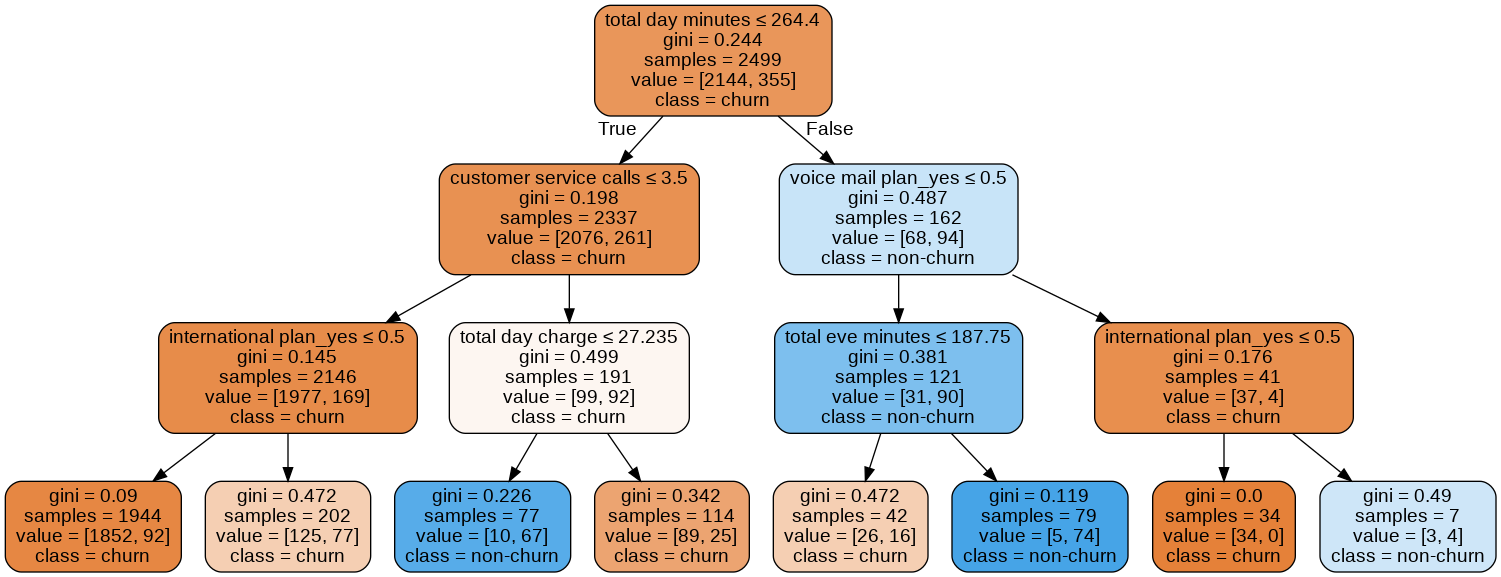

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['churn', 'non-churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('churn.png')
Image(graph.create_png())

# w grafie u niego na górze w węźle było total day charge (łączna opłata dzienna)
# a u mnie jest customer servece calls

### Grid Search - przeszukiwanie siatki parametrów

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
               'min_samples_leaf': [1, 5, 10, 20, 50],
               'criterion': ['gini', 'entropy']}]

gs = GridSearchCV(tree, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                       

In [ ]:
print('Najlepsza dokładność:', gs.best_score_)
print("Dokładność lepsza niż początkowa:", poczatkowa_dokladnosc)
print('Najlepsze parametry modelu', gs.best_params_)

Najlepsza dokładność: 0.940376753507014
Dokładność lepsza niż początkowa: 0.8968824940047961
Najlepsze parametry modelu {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}


In [ ]:
model = gs.best_estimator_
print(model)
print(model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.9460431654676259


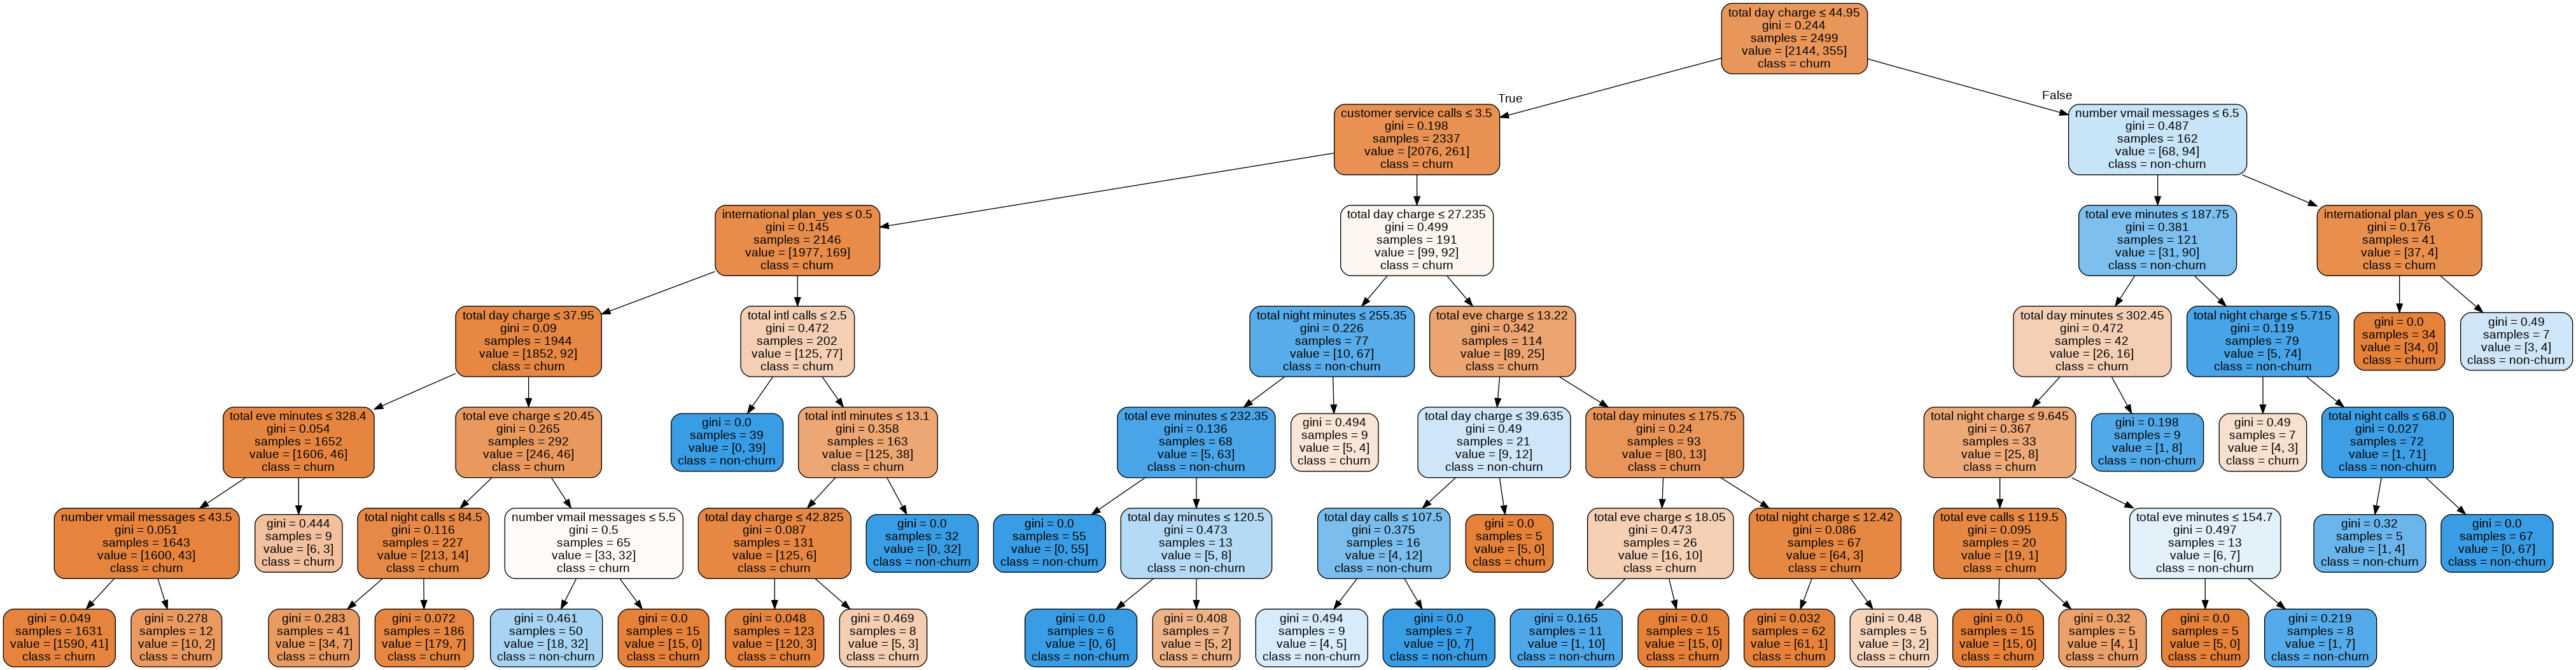

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['churn', 'non-churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('churn.png')
Image(graph.create_png())
# ma większą głębokość, ale zmienna ta sama co wtedy na górze (customer service calls)

In [ ]:
model.classes_

array([False,  True])

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}